## Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [1]:
#Import Libraries
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load and Explore Dataset
# Load the dataset from an Excel file
data = pd.read_excel('Airlines+Data.xlsx')

# Display the first few rows of the dataset
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
# Check for missing values in the dataset
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

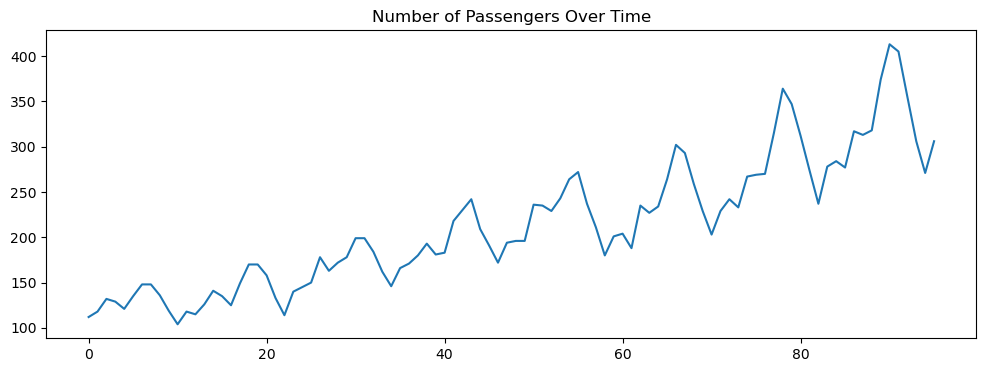

In [5]:
# Plot the number of passengers over time
data['Passengers'].plot(figsize=(12, 4), title='Number of Passengers Over Time');

In [6]:
#Descriptive Analysis
# Print the shape of the dataset
print('Shape of the dataset:', data.shape)

# Display data types of each column
data.dtypes

Shape of the dataset: (96, 2)


Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
# Display the number of unique values in each column
data.nunique()

Month         96
Passengers    80
dtype: int64

In [8]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
# Display descriptive statistics of the dataset
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
#Feature Engineering
# Rename 'Month' column to 'Date' for clarity
data.rename(columns={'Month': 'Date'}, inplace=True)

In [11]:
# Set 'Date' as the index of the dataframe
airline_data = data.copy()
airline_data.set_index('Date', inplace=True)
airline_data.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [12]:
# Display the first few rows of the modified dataframe
airline_data.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [13]:
#Data Visualization
# Extract month and year for visualization
data["Date"] = pd.to_datetime(data.Date, format="%b-%y")
data["Month"] = data.Date.dt.strftime("%b")  # Extract month
data["Year"] = data.Date.dt.strftime("%Y")   # Extract year
data.head(10)

,Date,Passengers,Month,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


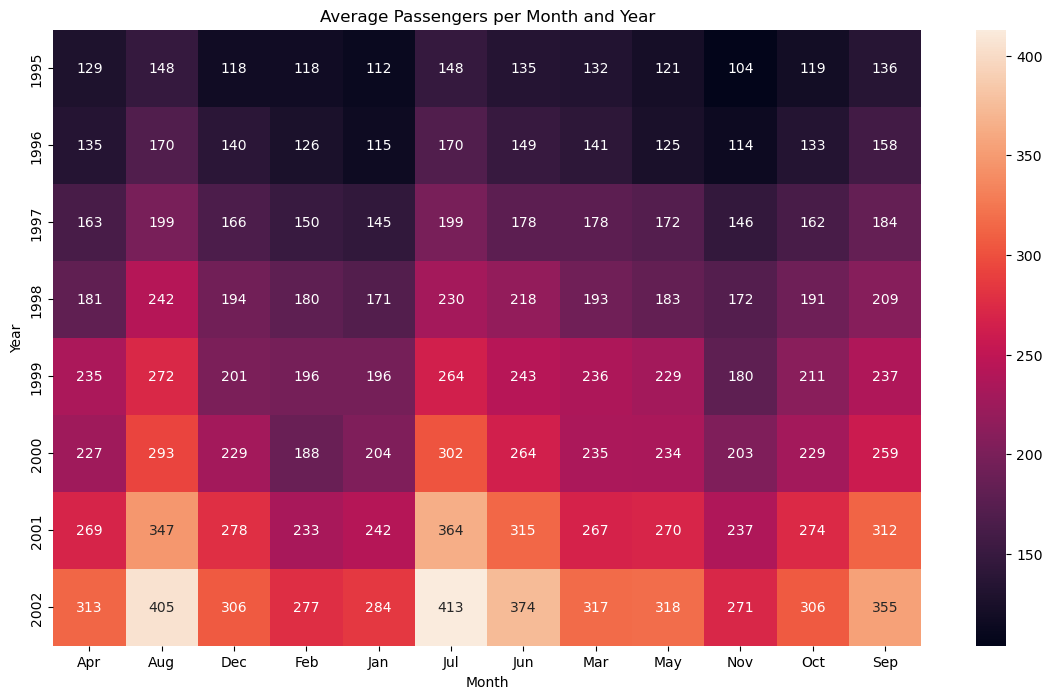

In [14]:
# Create a heatmap to visualize average passengers per month and year
plt.figure(figsize=(14, 8))
heatmap_data = pd.pivot_table(data=data, values="Passengers", index="Year", columns="Month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt="g")
plt.title('Average Passengers per Month and Year')
plt.show()

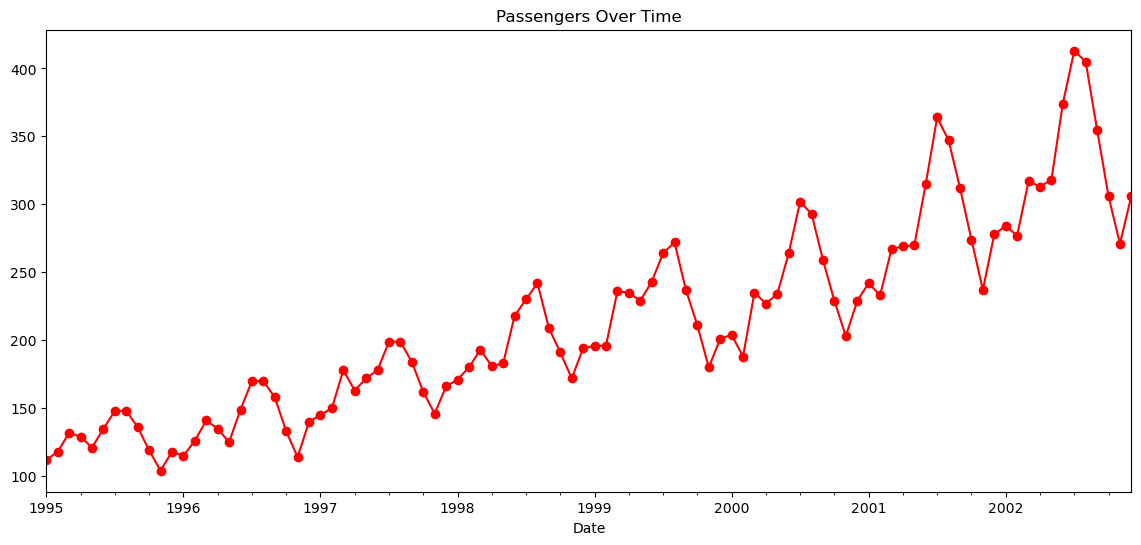

In [15]:
#Line Plot
# Plot a line graph of passengers over time
airline_data['Passengers'].plot(figsize=(14, 6), color='red', marker='o', title='Passengers Over Time')
plt.show()

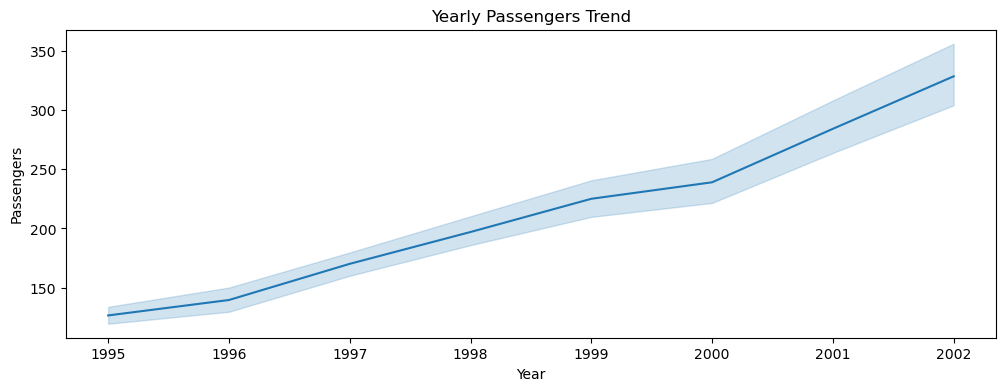

In [16]:
# Another line plot using seaborn
plt.figure(figsize=(12, 4))
sns.lineplot(x="Year", y="Passengers", data=data)
plt.title('Yearly Passengers Trend')
plt.show()

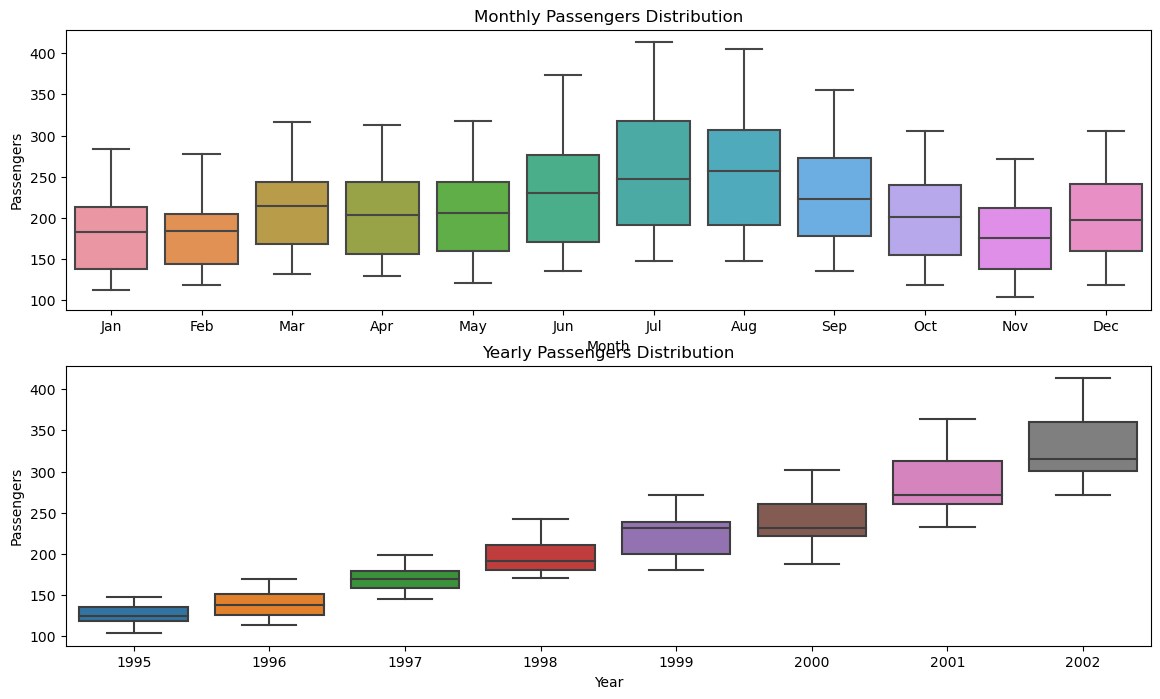

In [17]:
## Box Plot
# Box plot to visualize distribution of passengers by month and year
plt.figure(figsize=(14, 8))
plt.subplot(211)
sns.boxplot(x="Month", y="Passengers", data=data)
plt.title('Monthly Passengers Distribution')

plt.subplot(212)
sns.boxplot(x="Year", y="Passengers", data=data)
plt.title('Yearly Passengers Distribution')
plt.show()

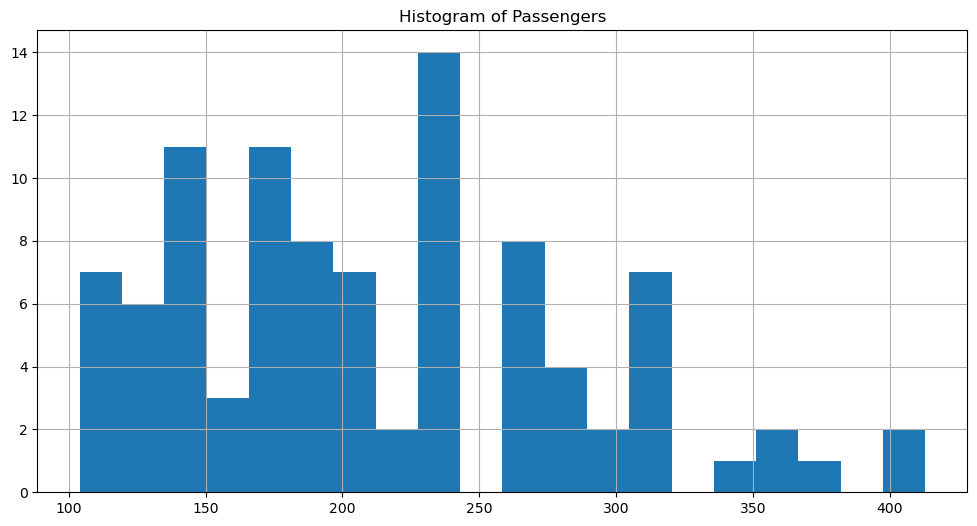

In [18]:
#Histogram and Density Plot
# Histogram of passengers
data.Passengers.hist(figsize=(12, 6), bins=20)
plt.title('Histogram of Passengers')
plt.show()

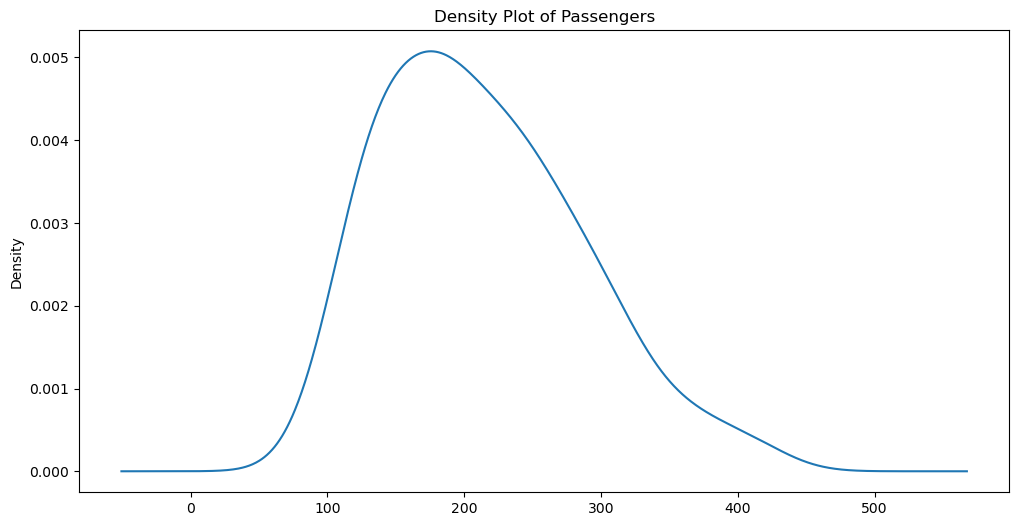

In [19]:
# Density plot of passengers
data.Passengers.plot(kind='kde', figsize=(12, 6), title='Density Plot of Passengers')
plt.show()

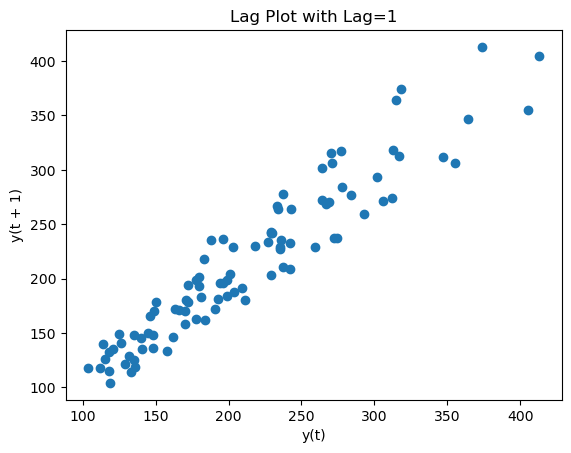

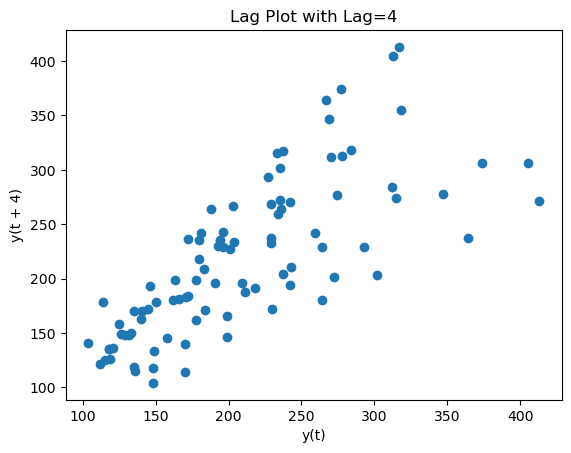

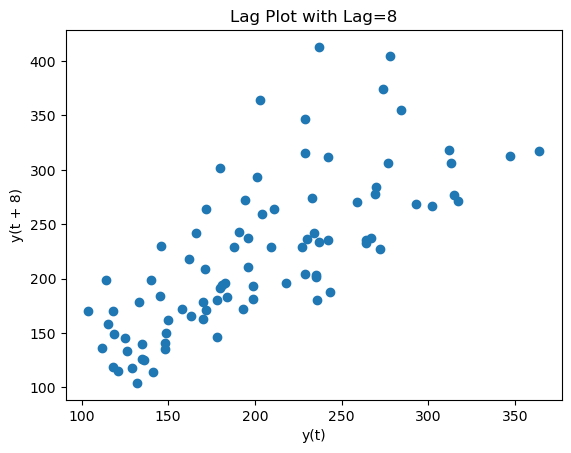

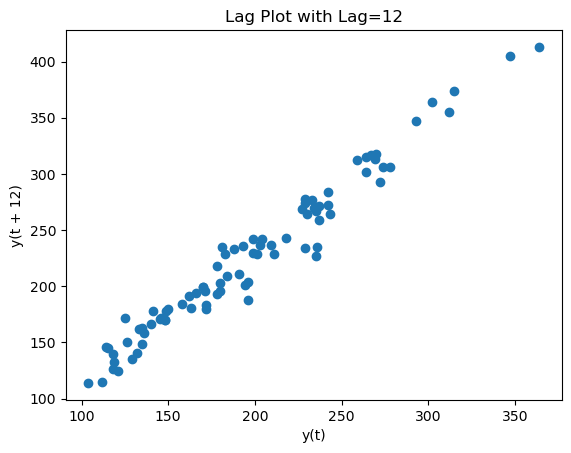

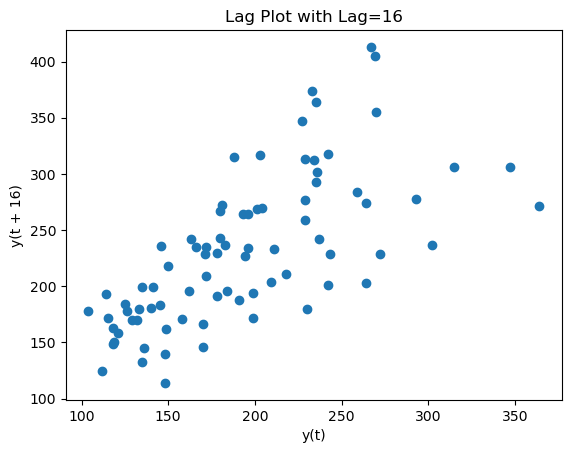

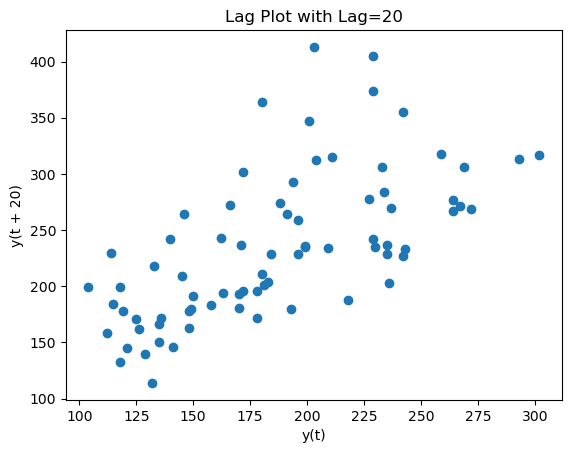

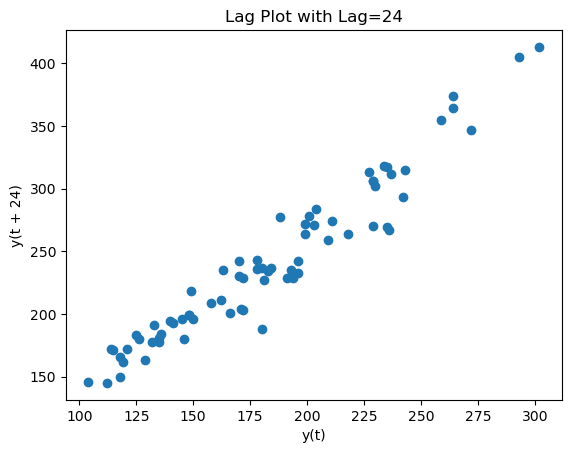

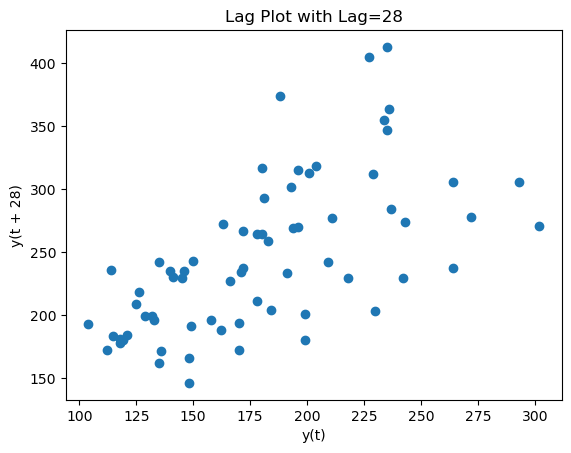

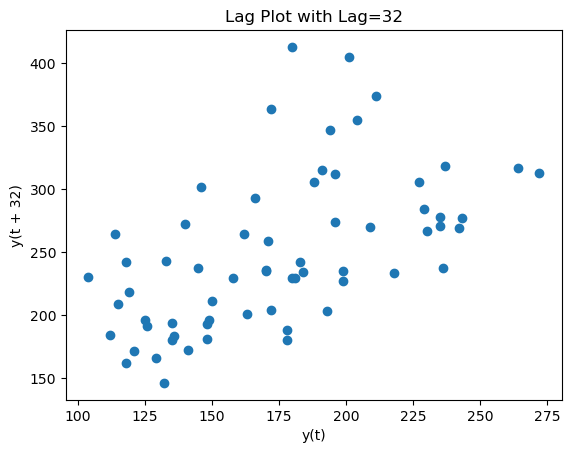

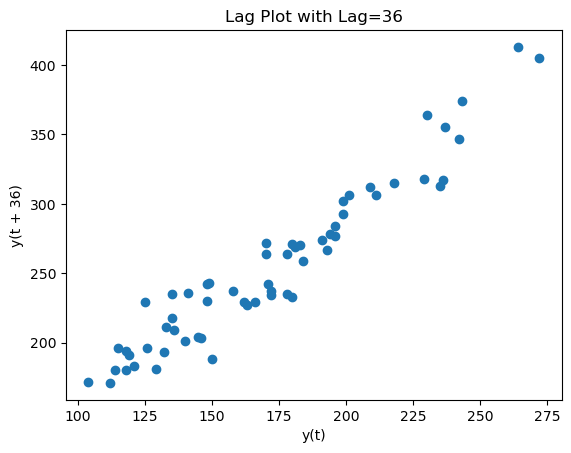

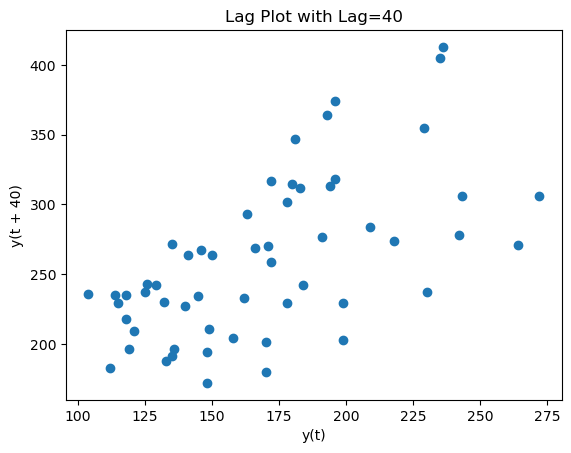

In [20]:
#Lag Plot
# Lag plot to check for autocorrelation
for lag in [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]:
  lag_plot(data.Passengers, lag=lag)
  plt.title(f'Lag Plot with Lag={lag}')
  plt.show()

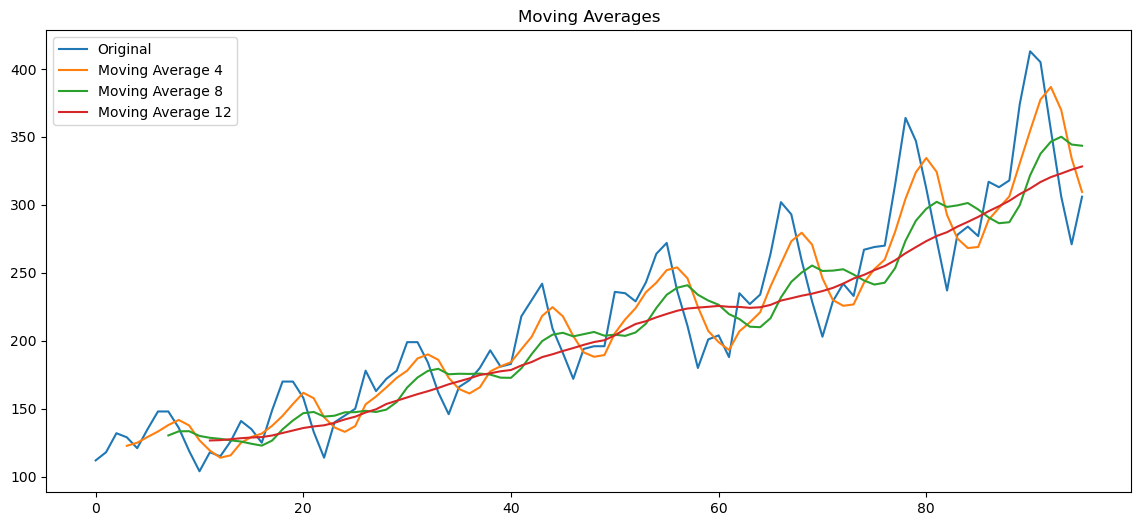

In [21]:
#Moving Average
# Plot moving averages to smooth the time series
plt.figure(figsize=(14, 6))
data.Passengers.plot(label="Original")
for window in range(4, 13, 4):
  data["Passengers"].rolling(window).mean().plot(label=f'Moving Average {window}')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.show()

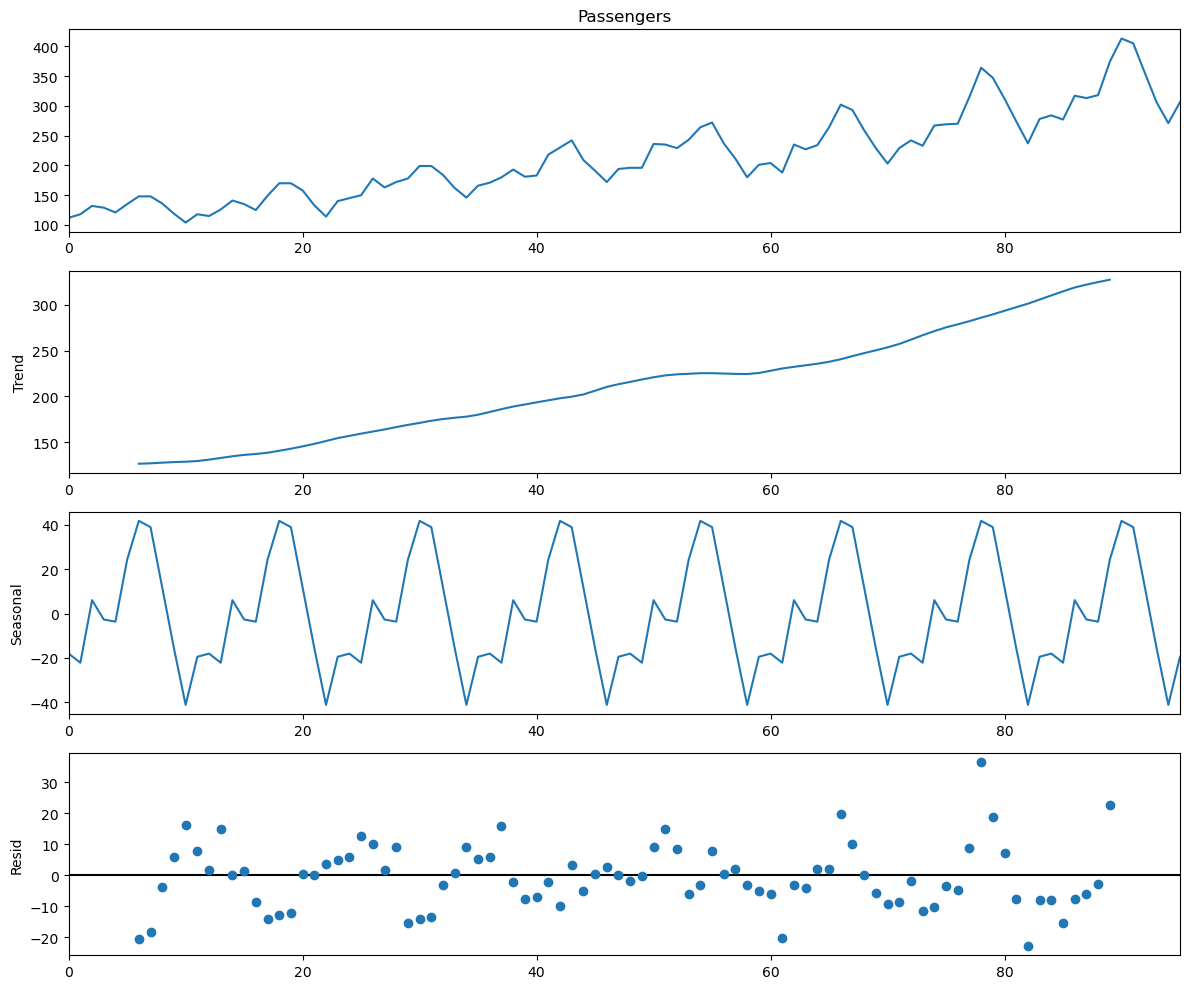

In [22]:
#Time Series Decomposition
# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(data.Passengers, period=12)
plt.rc("figure", figsize=(12, 10))
decomposition.plot()
plt.show()

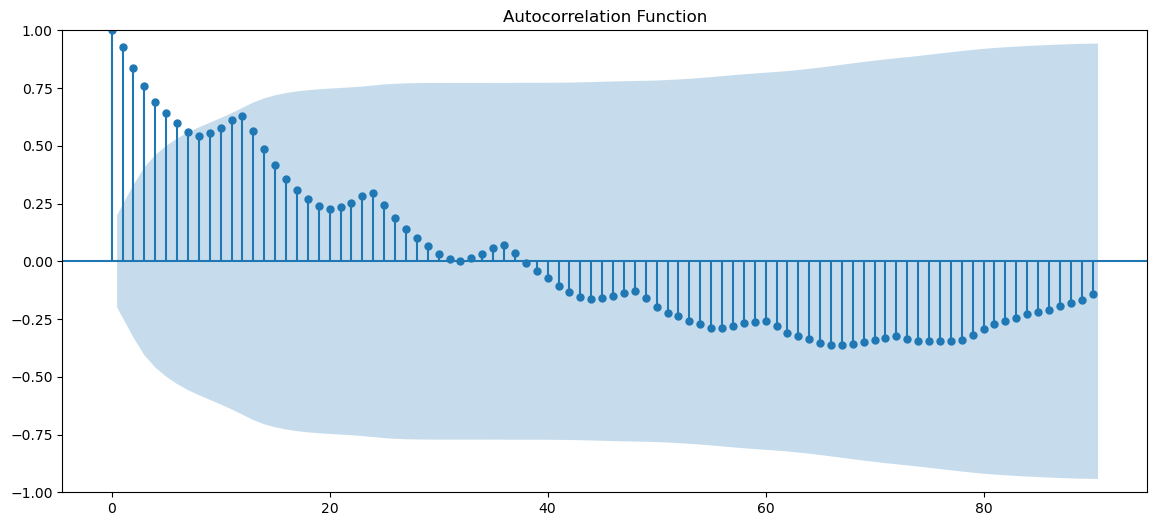

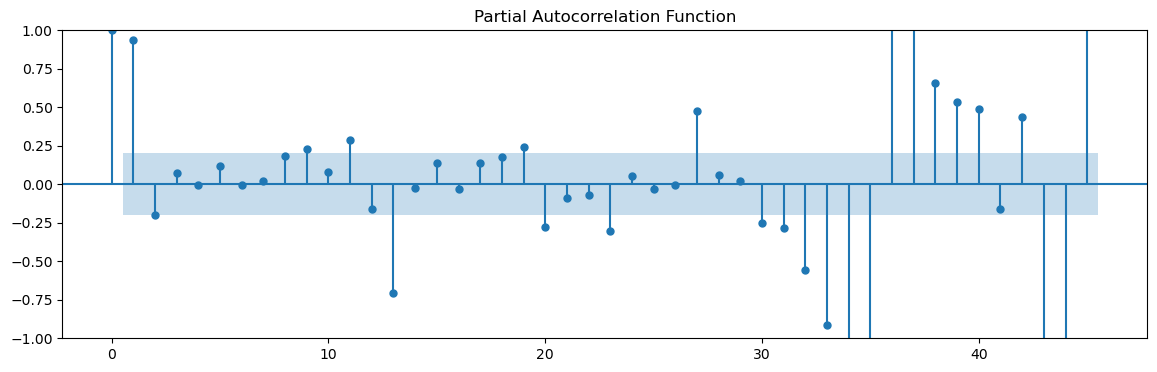

In [23]:
#ACF and PACF Plots
# Plot ACF and PACF to identify patterns in the time series
import statsmodels.graphics.tsaplots as tsa_plots
plt.rc("figure", figsize=(14, 6))
tsa_plots.plot_acf(data.Passengers, lags=90)
plt.title('Autocorrelation Function')
plt.show()

plt.rc("figure", figsize=(14, 4))
tsa_plots.plot_pacf(data.Passengers, lags=45)
plt.title('Partial Autocorrelation Function')
plt.show()

In [24]:
#Train-Test Split
# Split the data into training and test sets
train_size = 72
train_set = airline_data[:train_size]
test_set = airline_data[train_size:]

print('Train:', train_set.index.min(), train_set.index.max())
print('Test:', test_set.index.min(), test_set.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00
Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


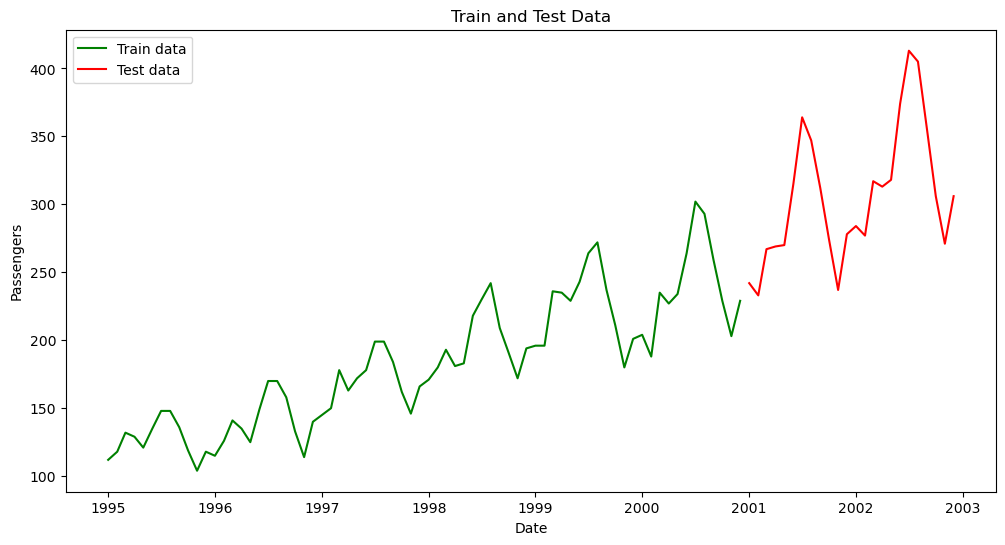

In [25]:
# Plot train and test data
plt.figure(figsize=(12, 6))
plt.plot(train_set, 'green', label='Train data')
plt.plot(test_set, 'red', label='Test data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [26]:
#Model Evaluation Function
# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(predictions, actuals):
  return np.mean(np.abs((predictions - actuals) / actuals) * 100)

In [27]:
#Simple Exponential Smoothing
# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train_set['Passengers']).fit(optimized=True)
ses_forecast = ses_model.forecast(24)
train_ses_fitted = ses_model.fittedvalues

# Calculate RMSE and MAPE
train_rmse_ses = sqrt(mean_squared_error(train_ses_fitted, train_set))
test_rmse_ses = sqrt(mean_squared_error(ses_forecast, test_set.Passengers))
mape_ses = calculate_mape(ses_forecast, test_set.Passengers)

print('Simple Exponential Smoothing Evaluation')
print(f'MAPE: {mape_ses:.2f}%')
print(f'Train RMSE: {train_rmse_ses:.2f}')
print(f'Test RMSE: {test_rmse_ses:.2f}')

Simple Exponential Smoothing Evaluation
MAPE: 23.38%
Train RMSE: 19.03
Test RMSE: 91.11


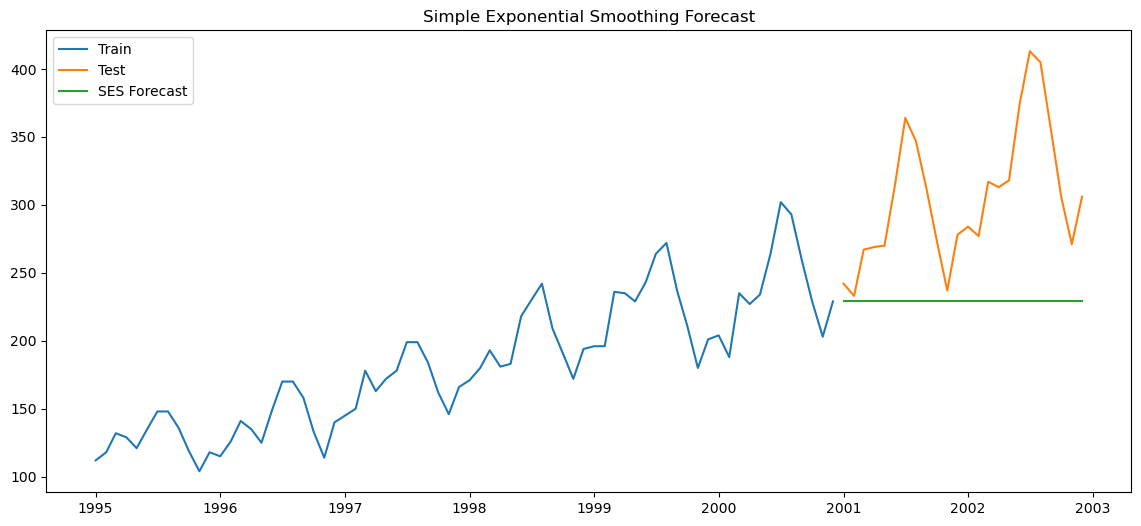

In [28]:
# Plot Simple Exponential Smoothing results
plt.figure(figsize=(14, 6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test')
plt.plot(ses_forecast, label='SES Forecast')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.show()

In [29]:
#Holt's Linear Trend Model
# Apply Holt's Linear Trend Model
holt_model = Holt(train_set).fit(optimized=True)
holt_forecast = holt_model.forecast(24)
train_holt_fitted = holt_model.fittedvalues

# Calculate RMSE and MAPE
train_rmse_holt = sqrt(mean_squared_error(train_holt_fitted, train_set))
test_rmse_holt = sqrt(mean_squared_error(holt_forecast, test_set.Passengers))
mape_holt = calculate_mape(holt_forecast, test_set.Passengers)

print('Holt\'s Linear Trend Model Evaluation')
print(f'MAPE: {mape_holt:.2f}%')
print(f'Train RMSE: {train_rmse_holt:.2f}')
print(f'Test RMSE: {test_rmse_holt:.2f}')

Holt's Linear Trend Model Evaluation
MAPE: 17.15%
Train RMSE: 18.96
Test RMSE: 71.64


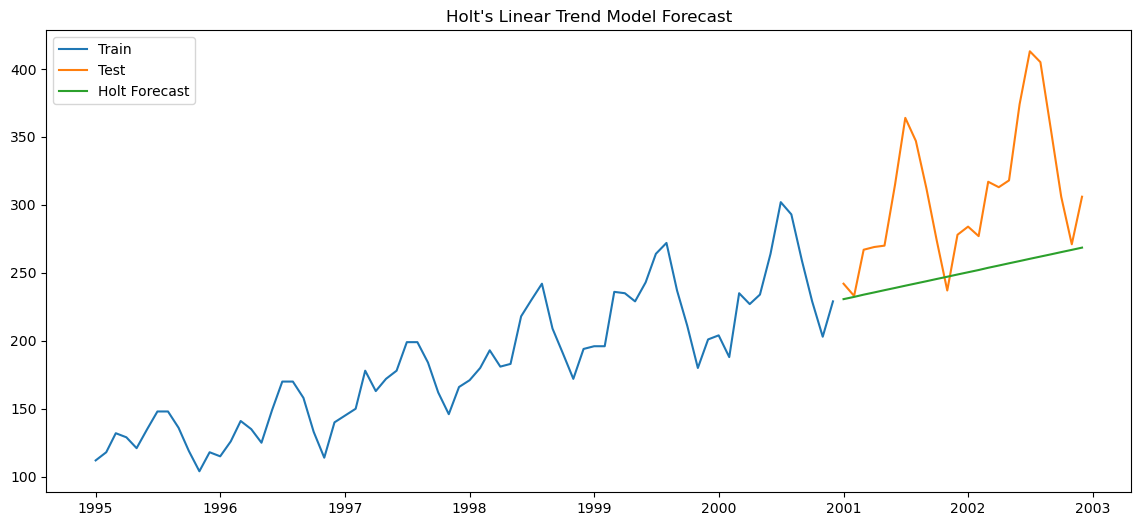

In [30]:
# Plot Holt's Linear Trend Model results
plt.figure(figsize=(14, 6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test')
plt.plot(holt_forecast, label='Holt Forecast')
plt.title('Holt\'s Linear Trend Model Forecast')
plt.legend(loc='best')
plt.show()

In [31]:
#Holt-Winters Seasonal Model
# Apply Holt-Winters Seasonal Model with Additive Seasonality
hw_add_model = ExponentialSmoothing(train_set, seasonal="add", trend="add", seasonal_periods=12).fit(optimized=True)
hw_add_forecast = hw_add_model.forecast(24)
train_hw_add_fitted = hw_add_model.fittedvalues

# Calculate RMSE and MAPE
train_rmse_hw_add = sqrt(mean_squared_error(train_hw_add_fitted, train_set))
test_rmse_hw_add = sqrt(mean_squared_error(hw_add_forecast, test_set.Passengers))
mape_hw_add = calculate_mape(hw_add_forecast, test_set.Passengers)

print('Holt-Winters Additive Model Evaluation')
print(f'MAPE: {mape_hw_add:.2f}%')
print(f'Train RMSE: {train_rmse_hw_add:.2f}')
print(f'Test RMSE: {test_rmse_hw_add:.2f}')

Holt-Winters Additive Model Evaluation
MAPE: 12.08%
Train RMSE: 7.75
Test RMSE: 47.57


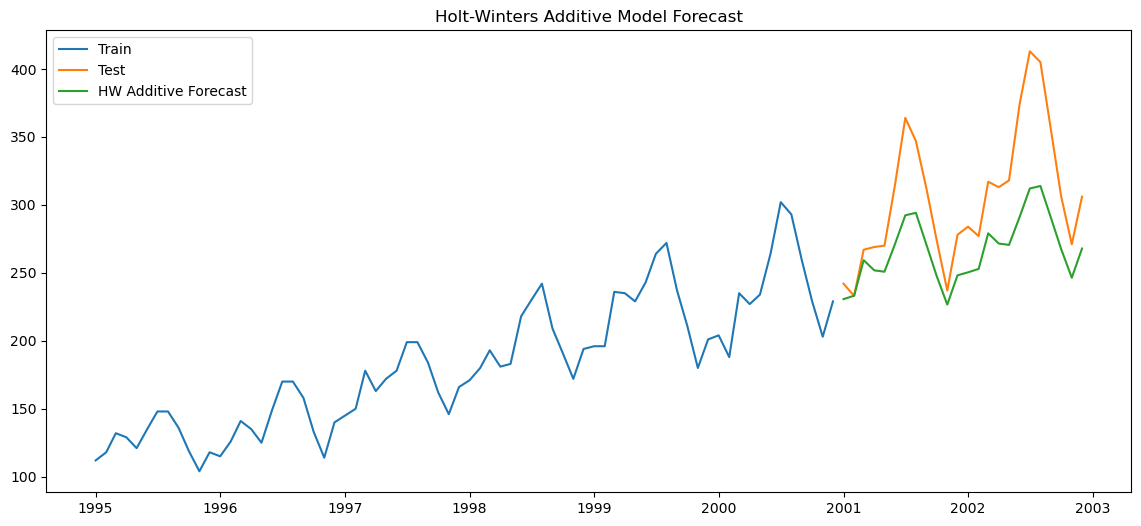

In [32]:
# Plot Holt-Winters Additive Model results
plt.figure(figsize=(14, 6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test')
plt.plot(hw_add_forecast, label='HW Additive Forecast')
plt.title('Holt-Winters Additive Model Forecast')
plt.legend(loc='best')
plt.show()

In [33]:
#ARIMA Model
# Fit ARIMA model
arima_model = ARIMA(train_set, order=(4, 1, 4))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(24)

# Calculate RMSE and MAPE
test_rmse_arima = sqrt(mean_squared_error(arima_forecast, test_set.Passengers))
mape_arima = calculate_mape(arima_forecast, test_set.Passengers)

print('ARIMA Model Evaluation')
print(f'MAPE: {mape_arima:.2f}%')
print(f'Test RMSE: {test_rmse_arima:.2f}')

ARIMA Model Evaluation
MAPE: 12.43%
Test RMSE: 52.72


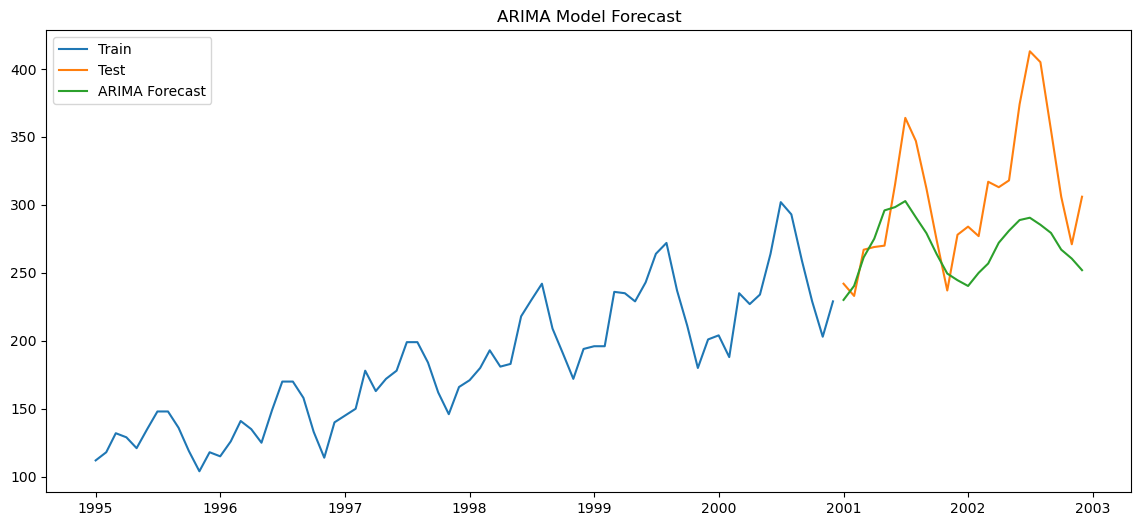

In [34]:
# Plot ARIMA model results
plt.figure(figsize=(14, 6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.legend(loc='best')
plt.show()

In [35]:
#SARIMA Model
# Fit SARIMA model
sarima_model = SARIMAX(train_set, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(24)

# Calculate RMSE and MAPE
test_rmse_sarima = sqrt(mean_squared_error(sarima_forecast, test_set.Passengers))
mape_sarima = calculate_mape(sarima_forecast, test_set.Passengers)

print('SARIMA Model Evaluation')
print(f'MAPE: {mape_sarima:.2f}%')
print(f'Test RMSE: {test_rmse_sarima:.2f}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99769D+00    |proj g|=  1.97983D-02

At iterate    5    f=  2.98161D+00    |proj g|=  2.31147D-03


 This problem is unconstrained.



At iterate   10    f=  2.98134D+00    |proj g|=  3.01366D-04

At iterate   15    f=  2.98134D+00    |proj g|=  5.41389D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   5.414D-07   2.981D+00
  F =   2.9813352497841294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA Model Evaluation
MAPE: 9.94%
Test RMSE: 37.14


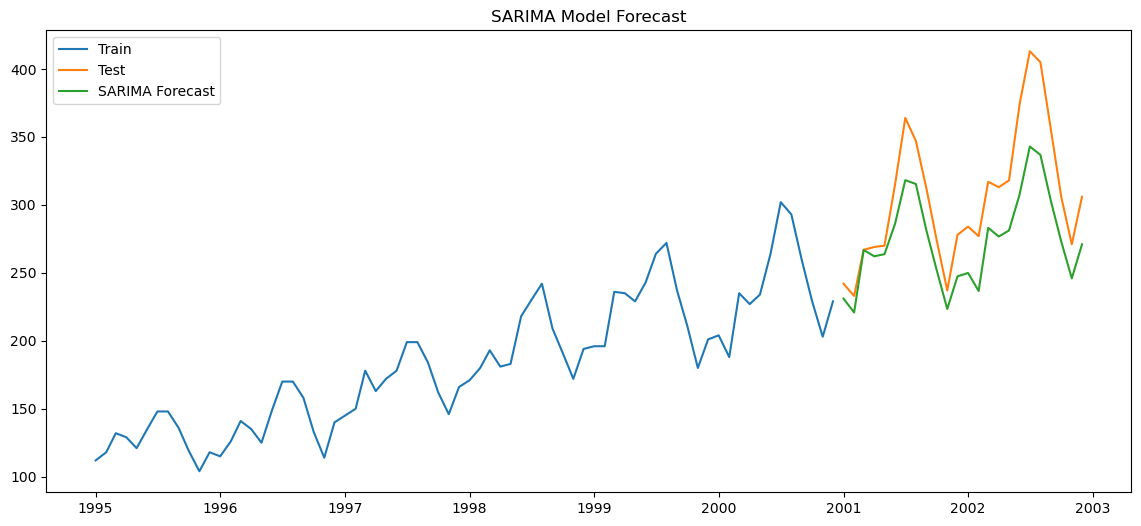

In [36]:
# Plot SARIMA model results
plt.figure(figsize=(14, 6))
plt.plot(train_set, label='Train')
plt.plot(test_set, label='Test')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Model Forecast')
plt.legend(loc='best')
plt.show()

In [37]:
##Model Comparison
# Compare model performance
evaluation_results = {
  "Model": ["Simple Exp Smoothing", "Holt's Linear", "HW Additive", "ARIMA", "SARIMA"],
  "Test RMSE": [test_rmse_ses, test_rmse_holt, test_rmse_hw_add, test_rmse_arima, test_rmse_sarima],
  "MAPE (%)": [mape_ses, mape_holt, mape_hw_add, mape_arima, mape_sarima]
}

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.sort_values(by='Test RMSE', inplace=True)
evaluation_df

,Model,Test RMSE,MAPE (%)
4,SARIMA,37.144638,9.936576
2,HW Additive,47.570784,12.084703
3,ARIMA,52.716570,12.427213
1,Holt's Linear,71.635016,17.149103
0,Simple Exp Smoothing,91.113254,23.382283


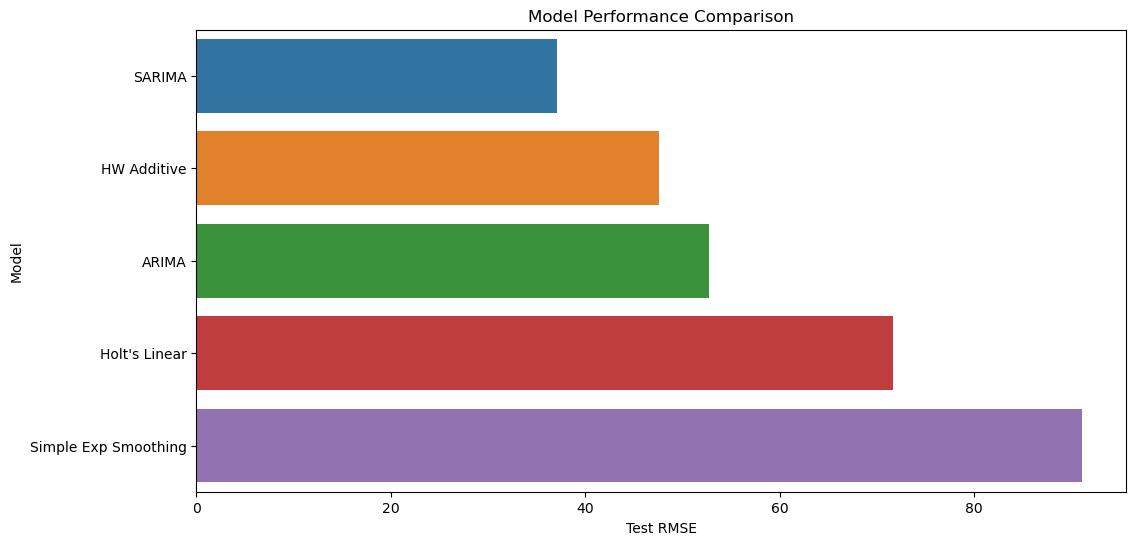

In [38]:
# Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Test RMSE', y='Model', data=evaluation_df)
plt.title('Model Performance Comparison')
plt.xlabel('Test RMSE')
plt.ylabel('Model')
plt.show()